# **EDA and Hypothesis**

## Objectives

* Collect sample data from Raverly API
* Clean dataset for analysis (main focus: yarn weight, gauge, free/paid patterns, popularity)
* Prepare the data so it can be reused later in notebooks and a dashboard

## Inputs

* a static CSV created from public Raverly API
* dataset limited to 100 knitting patterns fr exploratory analysis

## Outputs

* Summary statistics for pattern popularity
* Visualisations exploring yarn weight, gauge and free vs paid patterns
* Insights supporting or rejecting initial hypotheses


## Additional Comments

* The data collection was done in two steps, which resulted in two CSV files:

   * The first CSV contains basic pattern data from a public search endpoint and was used to select a manageable sample of patterns.

   * The second CSV includes detailed pattern information needed for analysis, such as yarn weight, gauge, popularity metrics, and price.

* A separate data fetch per pattern was required because this information is not available in the initial search results.

* The dataset was limited to 100 patterns to keep the project focused and suitable for exploratory analysis.

* Some missing values remain in the data (e.g. gauge or ratings), which reflects limitations of the source data.



---

# Section 1 Start EDA

In [14]:
# overview of cleaned patterns data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/v1/patterns_details_100.csv")
df.head()
df.info()
df.describe(include='all')


<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pattern_id               100 non-null    int64  
 1   name                     100 non-null    str    
 2   permalink                100 non-null    str    
 3   published                98 non-null     str    
 4   free                     100 non-null    bool   
 5   price                    91 non-null     float64
 6   currency                 94 non-null     str    
 7   downloadable             100 non-null    bool   
 8   craft                    100 non-null    str    
 9   pattern_categories       100 non-null    str    
 10  yarn_weight_id           99 non-null     float64
 11  yarn_weight_name         99 non-null     str    
 12  yarn_weight_description  99 non-null     str    
 13  gauge                    98 non-null     float64
 14  row_gauge                98 non-null  

,pattern_id,name,permalink,published,free,price,currency,downloadable,craft,pattern_categories,...,gauge_description,yardage,yardage_max,yardage_description,projects_count,favorites_count,queued_projects_count,difficulty_average,rating_average,rating_count
count,1.000000e+02,100,100,98,100,91.000000,94,100,100,100,...,98,92.000000,92.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,69.000000
unique,NaN,100,100,42,2,NaN,7,2,2,4,...,89,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Elza Sweater,elza-sweater,2026/01/01,False,NaN,DKK,True,Knitting,Pullover,...,20 stitches and 30 rows = 4 inches in stockine...,NaN,NaN,yards,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,35,94,NaN,54,95,89,97,...,5,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.203202e+06,NaN,NaN,NaN,NaN,36.200659,NaN,NaN,NaN,NaN,...,NaN,1069.032609,1833.086957,NaN,1406.660000,17314.410000,1681.620000,2.490017,3.283727,437.217391
std,3.013802e+06,NaN,NaN,NaN,NaN,23.565103,NaN,NaN,NaN,NaN,...,NaN,321.281447,558.351354,NaN,3885.475422,24788.721467,2677.889557,1.857122,2.215075,943.299963
min,7.107420e+05,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,98.000000,383.000000,NaN,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
25%,1.302555e+06,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,889.750000,1579.000000,NaN,9.250000,312.250000,32.000000,0.000000,0.000000,50.000000
50%,7.396078e+06,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,...,NaN,1094.500000,1774.500000,NaN,319.500000,9810.500000,812.000000,2.995575,4.701167,175.000000
75%,7.498128e+06,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,1237.000000,2069.750000,NaN,1341.250000,20226.500000,1759.250000,3.829644,4.801763,396.000000


---

# Section 2: Popularity Overview


Purpose of this section: 

explore how pattern popularity looks in this sample and which variables may relate to it.
Popularity is measured using projects_count and favorites_count (public Ravelry metrics).
I also compare free vs paid patterns, and check whether yarn weight and gauge show any visible relationship with popularity.
This is exploratory analysis, so the goal is to identify trends rather than prove causation.

In [22]:
# popularity metrics
df[['projects_count', 'favorites_count']].describe()



,projects_count,favorites_count
count,100.000000,100.000000
mean,1406.660000,17314.410000
std,3885.475422,24788.721467
min,0.000000,5.000000
25%,9.250000,312.250000
50%,319.500000,9810.500000
75%,1341.250000,20226.500000
max,33354.000000,125494.000000


---

2.1 Free vs paid patterns (boxplot)

In [23]:
# free vs paid patterns
df['free'].value_counts(dropna=False)



free
False    94
True      6
Name: count, dtype: int64

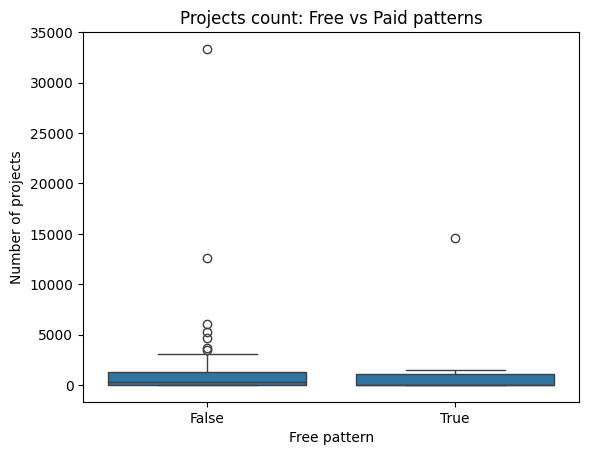

In [24]:

plt.figure()
sns.boxplot(data=df, x='free', y='projects_count')
plt.title("Projects count: Free vs Paid patterns")
plt.xlabel("Free pattern")
plt.ylabel("Number of projects")
plt.show()

In this plot, True = free patterns and False = paid patterns, based on the free flag from the Ravelry API.


Paid and free patterns show similar median popularity, but paid patterns have more extreme outliers.
This suggests that some paid designs become very popular despite the price, while free patterns tend to have more stable engagement.

2.2 Yarn weight vs popuparity (bar chart)

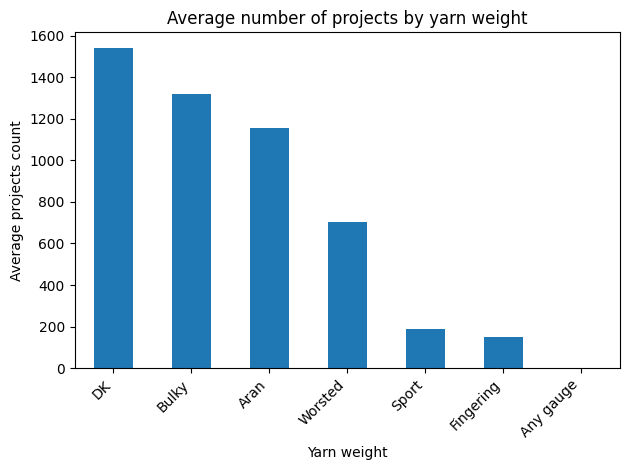

In [25]:
# Average popularity by yarn weight
plt.figure()
avg_projects = (
    df.groupby("yarn_weight_name")["projects_count"]
      .mean()
      .sort_values(ascending=False)
)

avg_projects.plot(kind="bar")
plt.title("Average number of projects by yarn weight")
plt.xlabel("Yarn weight")
plt.ylabel("Average projects count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


The chart compares pattern popularity across different yarn weights.
Medium yarn weights seem to be the most popular, likely because they are more practical and easier to work with for a wide range of projects.

2.3 Price vs Popularity (scatter plot)

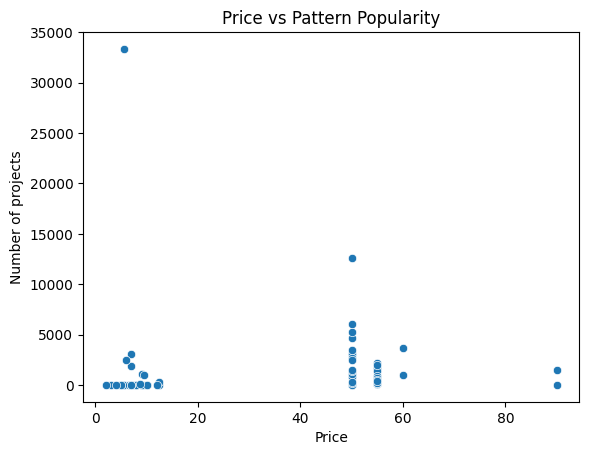

In [26]:
plt.figure()
sns.scatterplot(data=df, x='price', y='projects_count')
plt.title("Price vs Pattern Popularity")
plt.xlabel("Price")
plt.ylabel("Number of projects")
plt.show()


This scatter plot explores the relationship between pattern price and popularity.
No clear linear relationship is visible, suggesting that price alone does not determine engagement.

2.4 DIstribution of Popularity (Histogram)

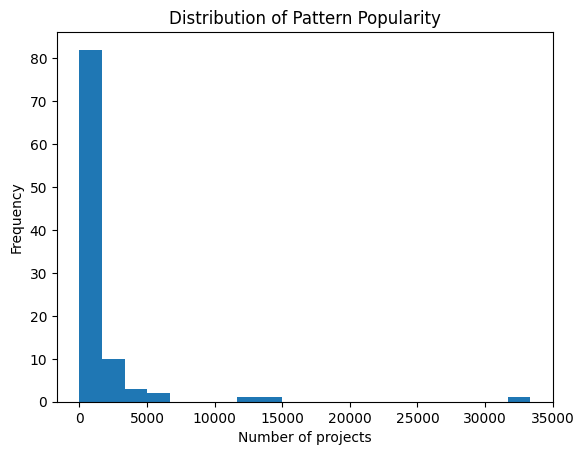

In [27]:
plt.figure()
plt.hist(df['projects_count'], bins=20)
plt.title("Distribution of Pattern Popularity")
plt.xlabel("Number of projects")
plt.ylabel("Frequency")
plt.show()


The histogram shows a highly skewed distribution of popularity, where most patterns have relatively low project counts and a small number of patterns are extremely popular.

NOTE

* The analysis is based on a sample of 100 knitting patterns collected from the Ravelry API.

* Popularity is measured using public metrics such as the number of projects and favourites.

* Exploratory analysis includes multiple visualisation types: bar charts, boxplots, scatter plots, and histograms, each addressing a specific business question.

* Some fields contain missing values (for example gauge, price or ratings), which reflects the optional nature of pattern metadata on Ravelry.

* Two different CSV files were created during data collection: one with basic search-level data and one with detailed pattern-level data.

* The second dataset was used for EDA, as it contains the variables required for analysing yarn weight, gauge and popularity.

* Although gauge was initially planned as a key analytical variable, it turned out to be treated as a largely descriptive field in the dataset, with many unique values and limited standardisation. As a result, gauge was not analysed in depth in this project and will require additional processing in future work.

---

# Conclusions

* The exploratory analysis shows that pattern popularity varies widely, with a small number of patterns attracting a very high number of projects.

* Free and paid patterns display similar typical popularity levels, although paid patterns include more extreme high-popularity outliers.

* Yarn weight appears to be related to popularity, with medium yarn weights being more commonly associated with higher project counts.

* The scatter analysis between price and popularity does not show a clear linear relationship, suggesting that price alone is not a strong predictor of engagement.

* Gauge did not show a clear relationship with popularity in this dataset, mainly due to the descriptive and highly varied way it is recorded.

* Pattern complexity was not analysed in this stage.

# Next steps

There is still some work to be done which include:
* standarise and group gauge values to make them more suitable for analytics.
* expand the dataset to include more patterns across diferent categories.
* analyse seasional pattens and check if yarn weight popularity is seasional (thicken in cold seasons, thinner in warm)
* Replicate the key EDA findings in a Power BI dashboard for clearer visual communication.